In [1]:
import mat73
import glob
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy import signal
from scipy.signal import butter,lfilter
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
from scipy.signal import welch
from scipy.signal import filtfilt, freqz
import numpy as np
import gc
import itertools
from collections import deque 
from sklearn.preprocessing import LabelEncoder
# #from keras.utils import np_utils
# from keras.models import Sequential, Model, load_model
# from keras.layers import Dense, Conv1D, Flatten, Dropout,GlobalMaxPooling1D, GlobalAveragePooling1D, MaxPooling1D, Input, GaussianNoise, LSTM, BatchNormalization, concatenate, Activation
# from keras import regularizers
# from keras.optimizers import Adam, Nadam, SGD
import random
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, roc_auc_score, f1_score, auc
import sklearn.metrics as mets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import itertools
import matplotlib.pyplot as plt
# from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
# from keras import initializers
import signal
# import tensorflow as tf    
# import keras.backend as kb
from sklearn.utils import shuffle
from tqdm import tqdm
from collections import Counter
import pywt
from pywt import Wavelet
from pywt import wavedec
import re
import sys

In [2]:
train_df = pd.read_csv('features_new.csv')
train_df

,power_delta,power_theta,power_alpha,power_beta,power_gamma,D4_Ratio,D3_Ratio,D2_Ratio,D1_Ratio,D4_LSWT,...,D2_LSWT,D1_LSWT,D4_mean,D3_mean,D2_mean,D1_mean,D4_mean_abs,D3_mean_abs,D2_mean_abs,D1_mean_abs
0,2354.356741,1335.227830,563.369333,201.993305,168.732942,1.026267,1.248435,0.986999,0.289446,0.000000,...,7.479595,7.029941,-33.058905,6.658946,5.701102,0.284317,134.649612,131.203278,75.538820,21.864417
1,240.956849,399.891553,223.867627,120.316885,99.194943,0.692773,1.510398,0.970488,0.476990,6.222881,...,7.074678,4.802292,-5.847118,-10.956531,3.923210,-2.277889,58.350265,84.227096,53.179408,25.366040
2,333.733410,518.965202,306.519826,144.611543,113.769041,0.793056,1.560006,0.776222,0.531554,6.724824,...,6.172348,6.856043,4.472549,-10.931809,-1.683151,1.039592,77.695596,97.969892,47.906379,25.464838
3,223.273517,1151.961480,865.566799,624.718742,440.967836,0.402320,1.828042,1.022717,0.509960,7.241680,...,0.000000,7.716181,-7.105657,27.556930,-12.982547,2.482216,57.178686,142.122324,98.312665,50.135508
4,371.180551,561.992728,355.191082,168.217985,144.407701,0.818779,1.454627,0.874147,0.489849,7.476118,...,0.000000,3.783384,46.108691,2.596274,-2.311170,-0.983727,83.078122,101.465827,56.429593,27.641996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346371,331.155250,639.131841,433.439741,231.400081,171.053337,0.594644,1.682788,0.925589,0.476889,0.000000,...,6.304848,5.032575,-9.789473,33.198968,1.863644,-0.643743,61.952598,104.184375,61.870944,29.505574
346372,227.002658,285.023662,173.838140,96.568021,77.278329,1.028535,1.133602,1.063468,0.521486,6.354053,...,6.632320,0.000000,14.285697,17.242077,5.132531,-0.466701,64.614789,62.822178,46.221585,24.103927
346373,420.273084,592.268320,340.749731,163.587260,133.749891,0.854273,1.417879,0.861753,0.523211,6.767704,...,0.000000,5.640158,22.154820,15.424827,-1.274873,0.484593,81.619709,95.542878,53.149048,27.808155
346374,288.262590,277.850187,194.050052,88.595216,66.448323,0.570297,1.653863,0.986616,0.462172,6.434120,...,6.185177,0.000000,6.338394,-6.303334,0.524748,-1.675622,39.231050,68.790616,43.956775,20.315575


In [3]:
train_Y = np.array(pd.read_csv('y_new.csv'))
train_Y

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]], shape=(346376, 1))

In [4]:
test_df = pd.read_csv('features_new_test.csv')
test_df

,power_delta,power_theta,power_alpha,power_beta,power_gamma,D4_Ratio,D3_Ratio,D2_Ratio,D1_Ratio,D4_LSWT,...,D2_LSWT,D1_LSWT,D4_mean,D3_mean,D2_mean,D1_mean,D4_mean_abs,D3_mean_abs,D2_mean_abs,D1_mean_abs
0,0.009700,0.014187,0.010112,0.010309,0.012571,1.244296,0.965152,1.079370,0.645079,0.000000,...,0.743995,1.440487,-0.135818,-0.023078,-0.013226,0.014571,0.500810,0.402484,0.333223,0.214955
1,0.011410,0.016752,0.013135,0.010054,0.009777,0.792172,1.321779,0.954619,0.707999,1.467183,...,1.684658,0.000000,0.227630,0.062072,0.080256,-0.003778,0.381240,0.481259,0.346959,0.245647
2,0.012570,0.015388,0.011009,0.009714,0.008762,0.943871,1.242188,0.891819,0.741538,0.179268,...,0.000000,0.561584,-0.071917,-0.042207,-0.022625,-0.003778,0.456330,0.483466,0.322081,0.238836
3,51712.228246,5244.543528,1653.057482,1874.968704,1733.680123,3.205780,0.484117,1.162767,0.639479,8.801787,...,0.000000,8.705011,275.823352,74.775283,-61.188154,29.726623,472.787659,147.479746,136.485160,87.279420
4,291.056197,1398.921638,899.465094,514.455918,408.615703,0.680457,1.651162,0.794780,0.632510,5.064895,...,6.678963,0.000000,-57.878471,22.477353,-2.305806,-9.097839,115.812242,170.197654,90.342769,57.142698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55312,1337.659173,1427.469364,1001.674929,648.667564,491.655433,0.997161,1.090224,1.108226,0.610406,6.248788,...,0.000000,6.674458,-34.390933,23.176482,-19.269353,-1.725498,138.398714,138.792756,116.214535,70.938054
55313,2529.868121,1243.471831,922.707791,534.692263,419.601713,0.954504,1.232140,0.922012,0.673707,7.097046,...,4.988308,0.000000,85.023392,6.034618,0.872008,-1.020877,135.288576,141.737110,94.778065,63.852648
55314,5875.434820,3201.563634,1849.437225,2211.730167,1950.857812,1.282546,0.960778,0.951295,0.850990,5.246727,...,0.000000,8.190528,-100.391748,31.399779,-29.880725,21.115911,239.086654,186.415656,148.964663,126.767379
55315,8211.687745,9690.168299,10602.889418,6346.897206,5471.749818,0.748209,1.223875,1.182545,0.562528,7.796735,...,8.333340,0.000000,65.238100,175.494795,51.514790,-15.835514,300.577395,401.728993,355.909348,200.209102


In [5]:
test_Y = np.array(pd.read_csv('y_new_test.csv'))
test_Y

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]], shape=(55317, 1))

In [6]:
shape_list=[(15237, 200),
 (15237, 200),
 (2460, 200),
 (2593, 200),
 (2578, 200),
 (2649, 200),
 (2018, 200),
 (3064, 200),
 (3599, 200),
 (5882, 200)]

indices=[x[0] for x in shape_list]
indices=np.cumsum(indices)
indices

array([15237, 30474, 32934, 35527, 38105, 40754, 42772, 45836, 49435,
       55317])

In [7]:
len(indices)

10

In [8]:
test_df_list=[]
test_Y_list=[]
for i in range(10):
    if i==0:
        mdf=test_df[:indices[i]]
        tY=test_Y[:indices[i]]
    elif i>0 and i<=9:
        mdf=test_df[indices[i-1]:indices[i]]
        tY=test_Y[indices[i-1]:indices[i]]
    test_df_list.append(mdf)
    test_Y_list.append(tY)
    

In [9]:
len(test_df_list),len(test_Y_list)

(10, 10)

In [10]:
test_df_list[-1].shape, test_df_list[-2].shape, 

((5882, 21), (3599, 21))

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
import random

In [12]:
RANDOM_STATE=random.randint(0,10)

# Logistic Regression
pipe_reg = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(class_weight='balanced',
                                                solver = 'liblinear',
                                                random_state=RANDOM_STATE))])

# Support Vector Machine
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(kernel='rbf', 
                                class_weight = 'balanced',
                                probability=True,
                                random_state=RANDOM_STATE))])

# Decision Tree
DT = DecisionTreeClassifier(random_state=RANDOM_STATE, 
                            class_weight = 'balanced')

# Random Forest
rt = RandomForestClassifier(random_state=RANDOM_STATE, 
                            class_weight = 'balanced')

# K-Nearest Neighbours
pipe_kkn = Pipeline([('scl', StandardScaler()),
                    ('clf', KNeighborsClassifier())])

# list of classifier names
classifier_names = ['Logistic Regression',
                    'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']#, 'Support Vector Machine']

# list of classifiers
classifiers = [pipe_reg, DT, rt, pipe_kkn]#, pipe_svc]

Logistic Regression


/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


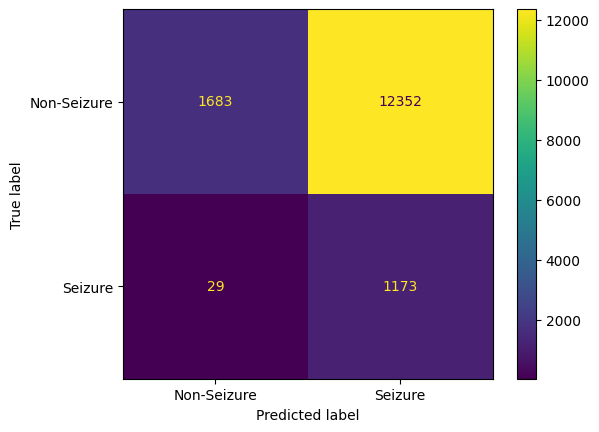

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


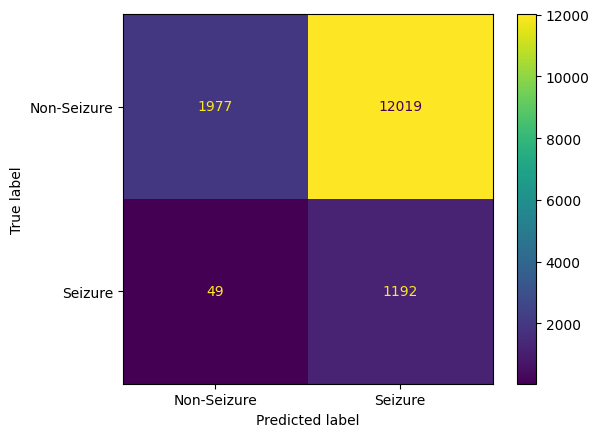

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


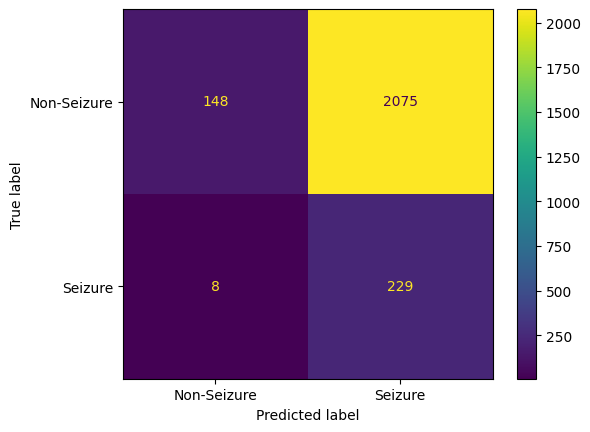

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


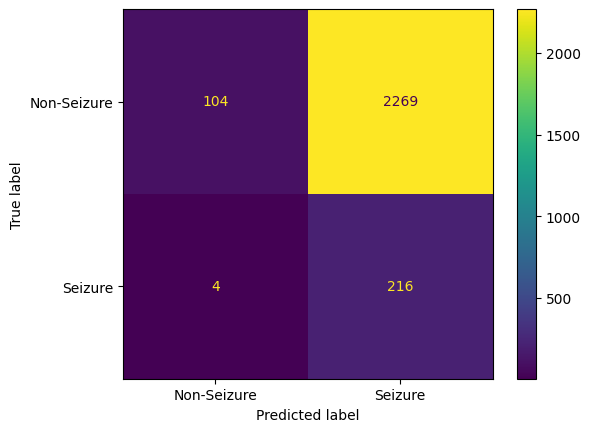

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


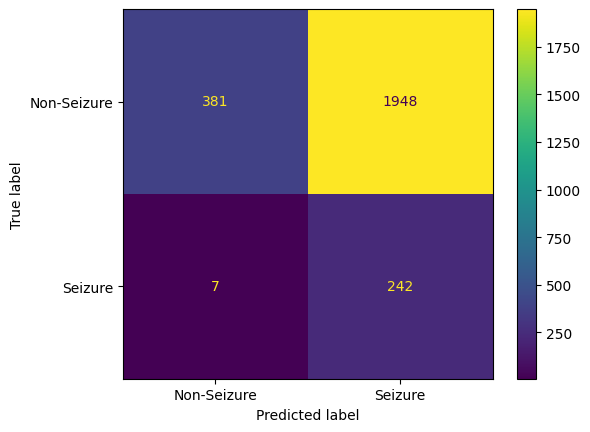

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


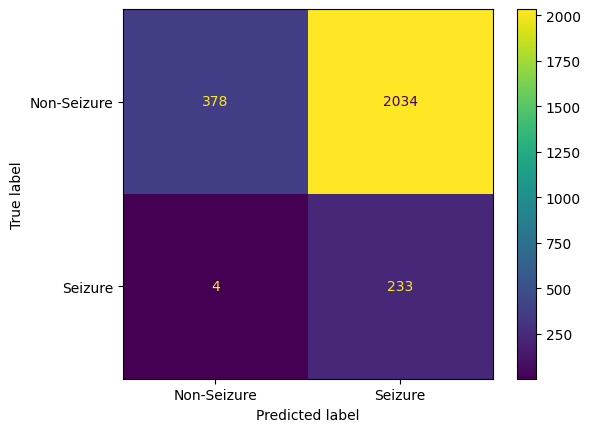

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


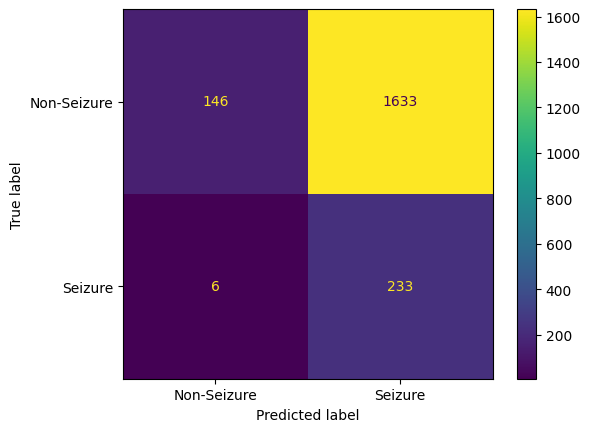

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


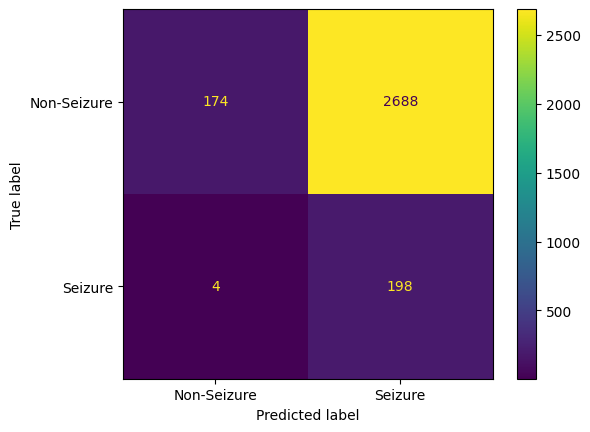

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


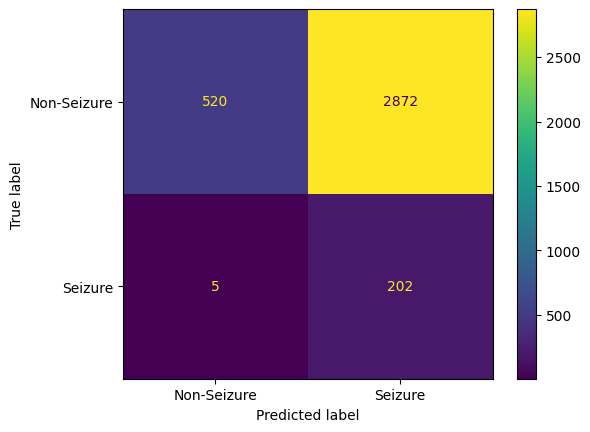

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


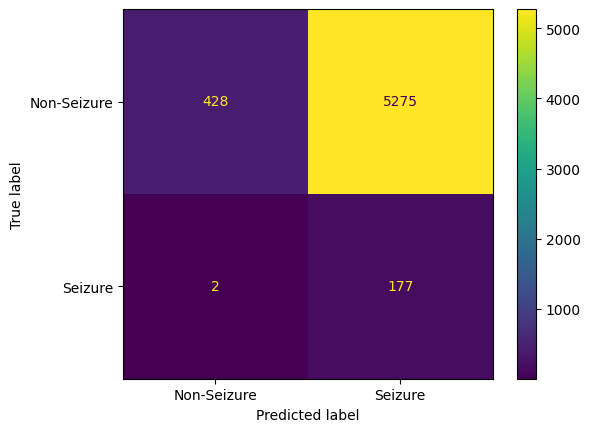

Decision Tree


/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


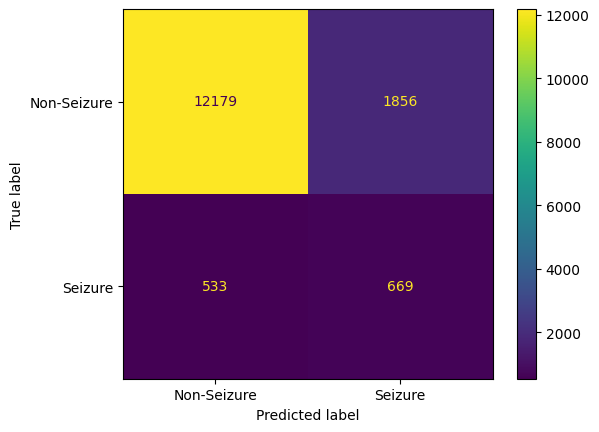

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


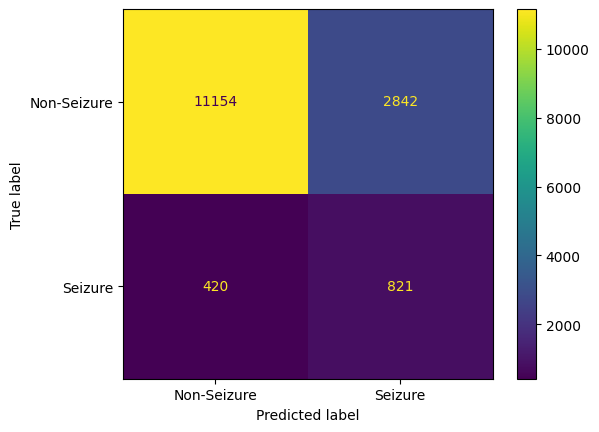

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


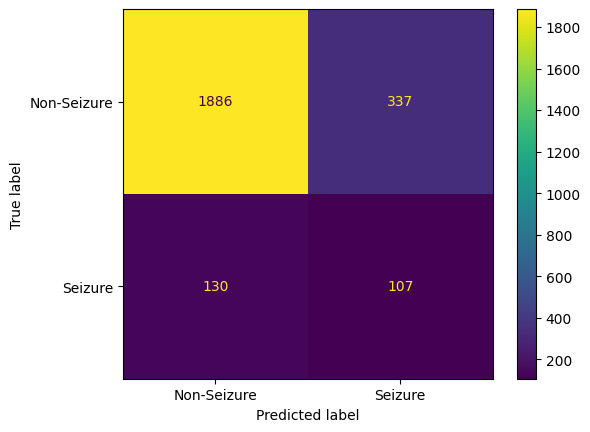

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


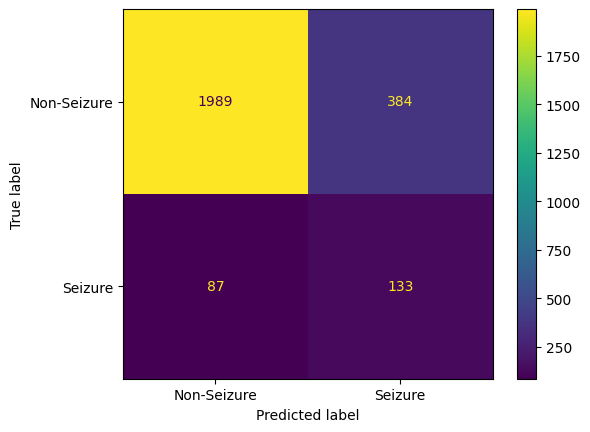

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


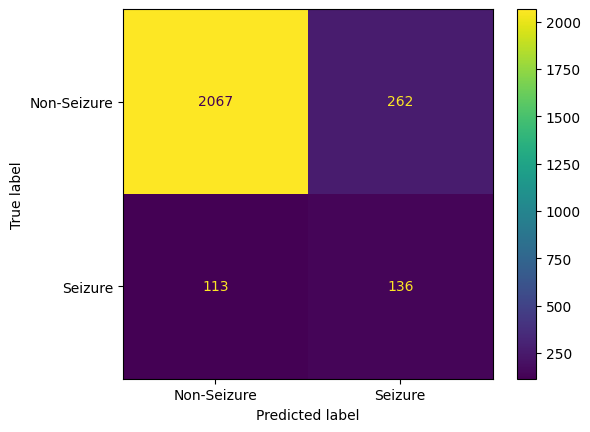

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


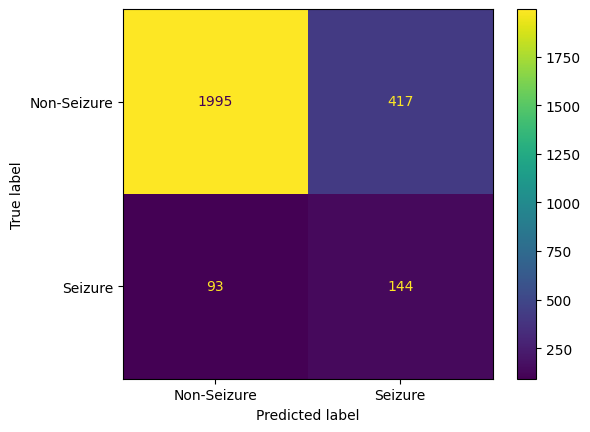

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


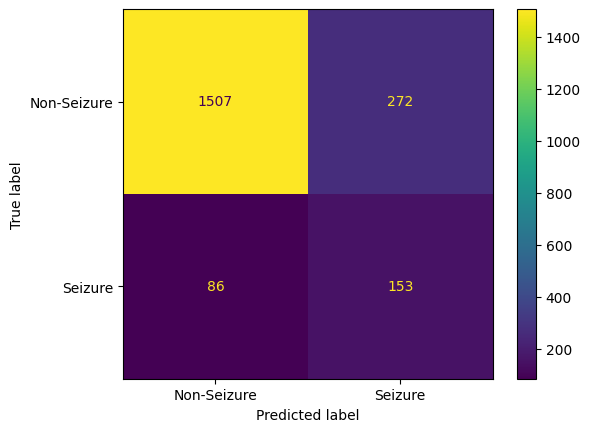

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


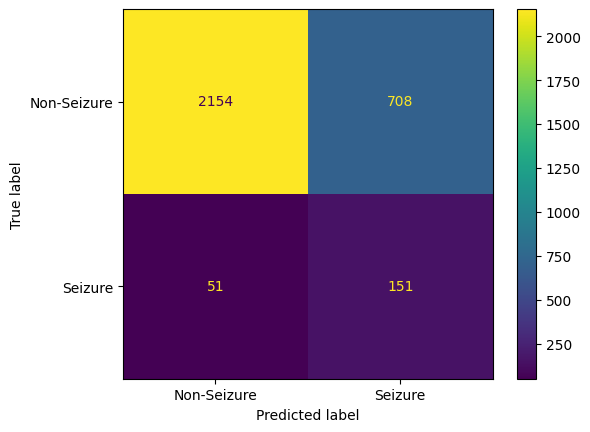

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


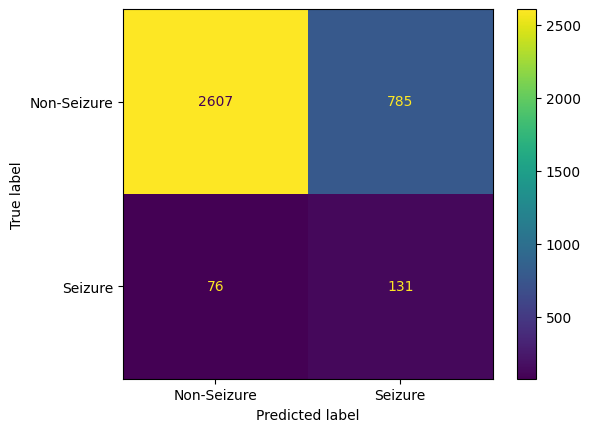

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


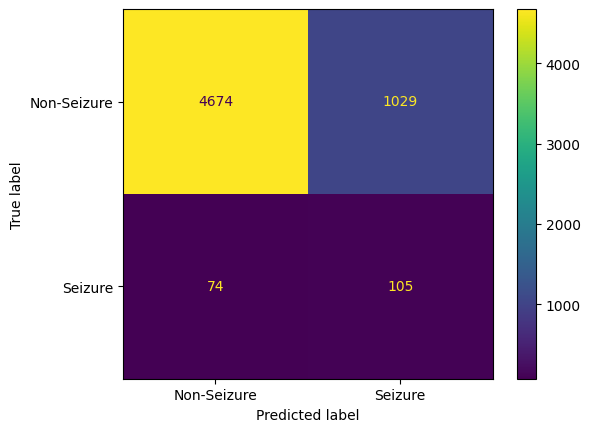

Random Forest


/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


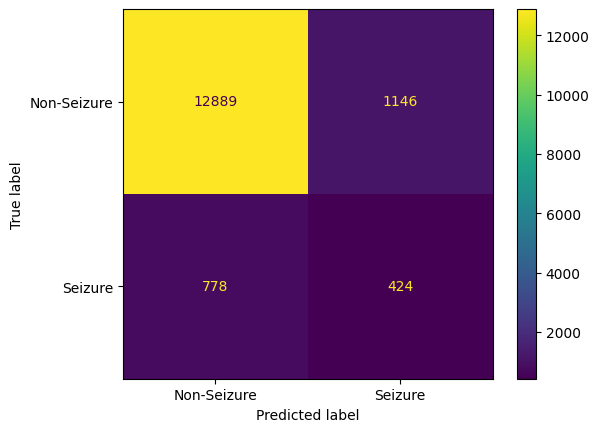

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


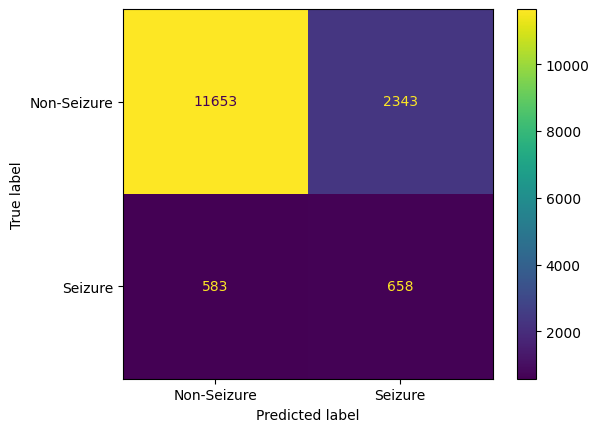

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


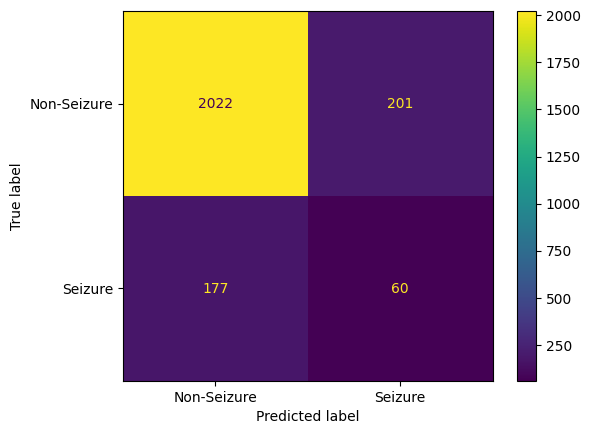

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


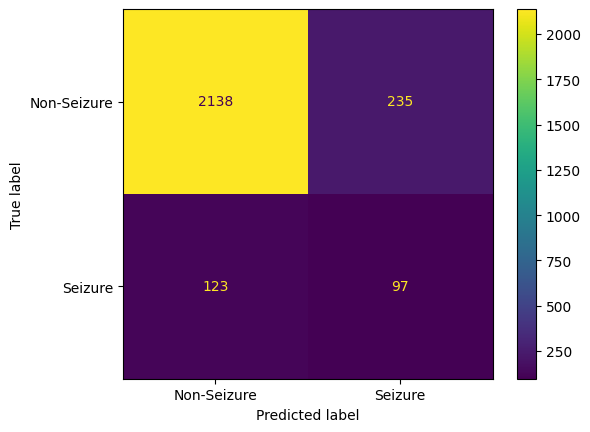

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


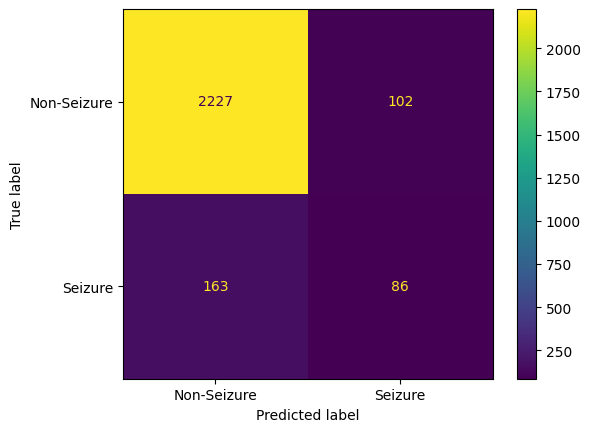

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


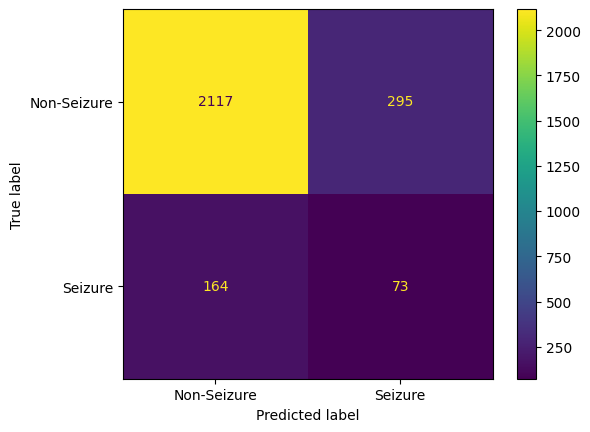

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


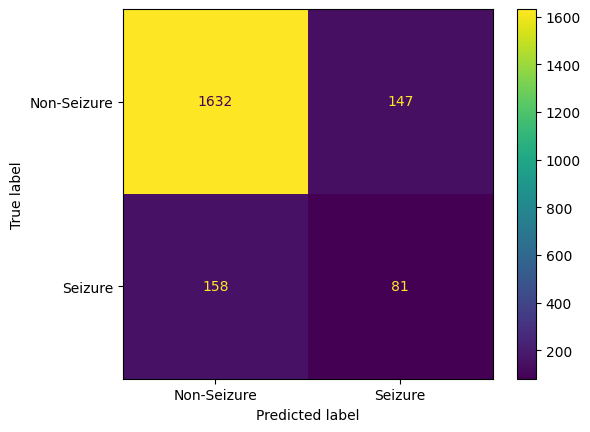

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


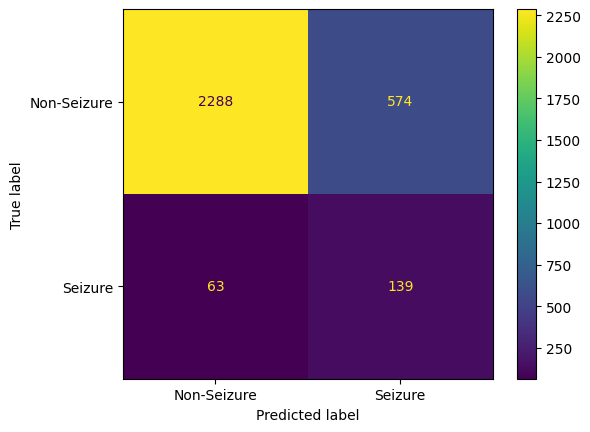

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


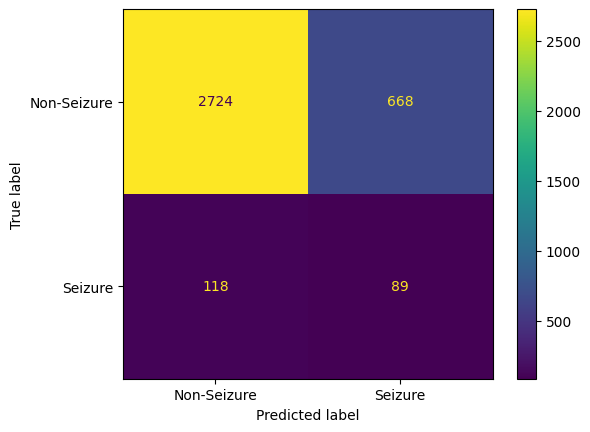

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


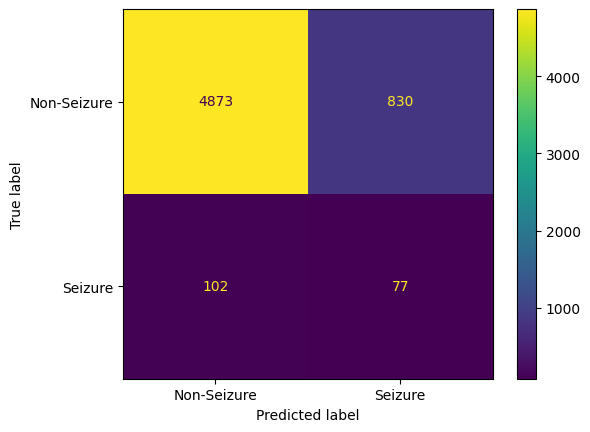

K-Nearest Neighbors


/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


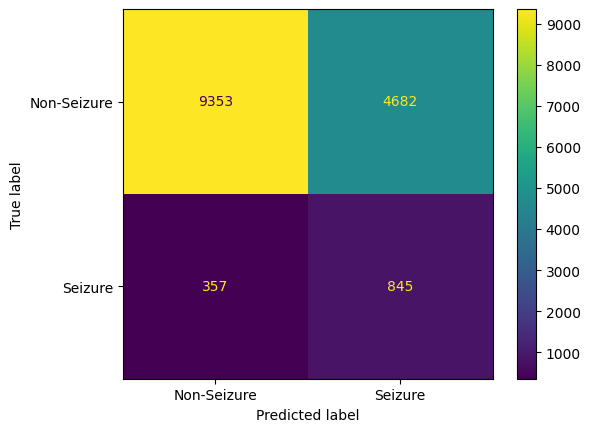

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


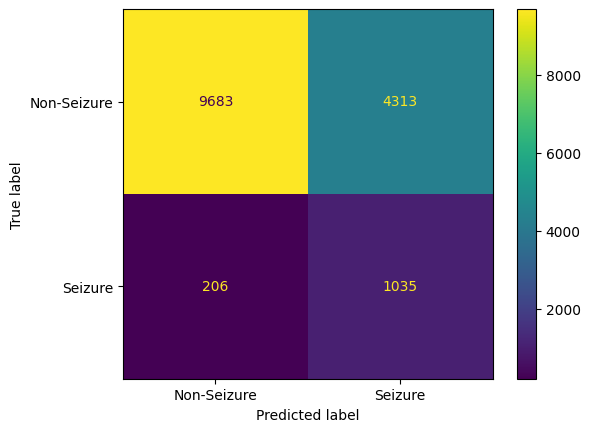

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


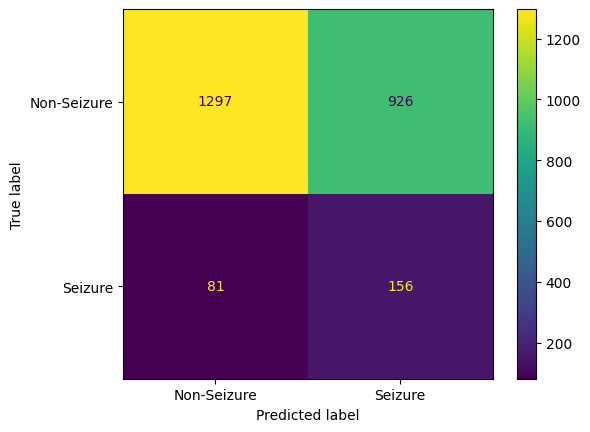

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


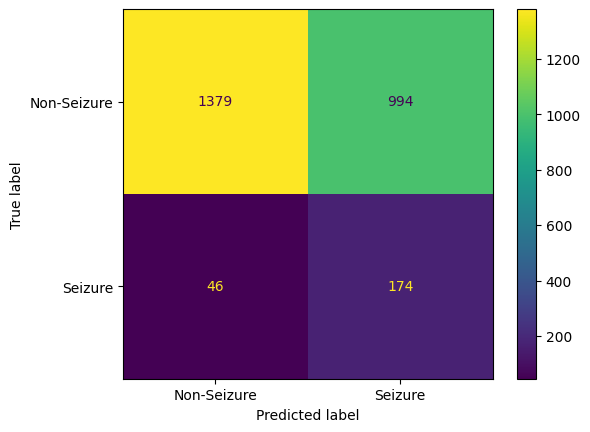

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


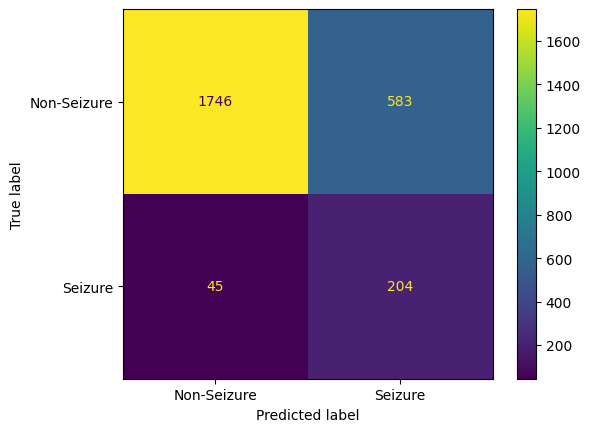

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


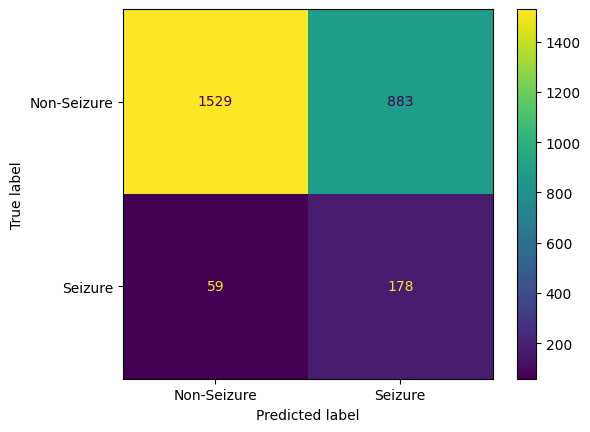

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


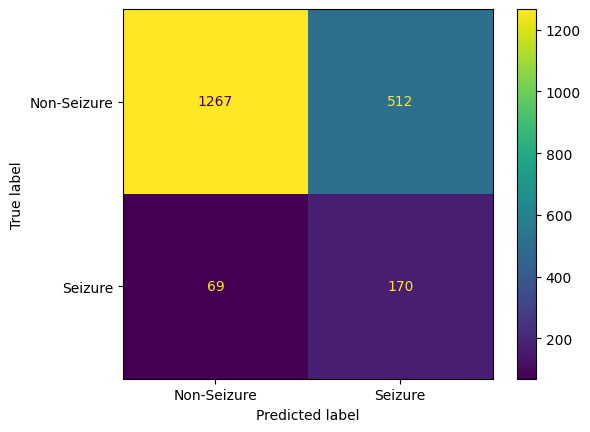

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


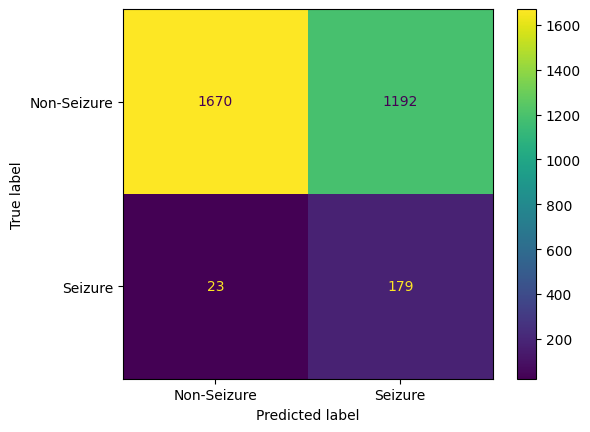

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


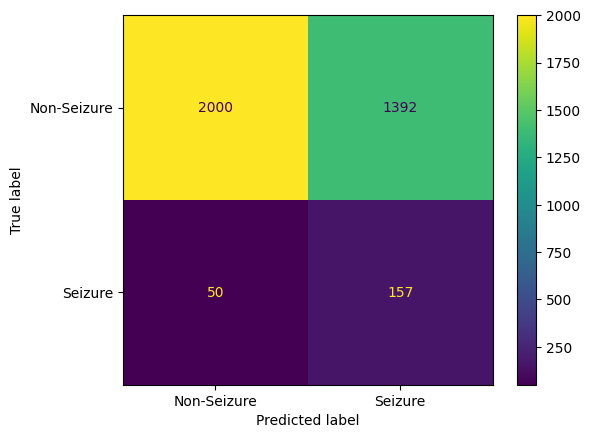

/standard/ivy-hip-rderi/ss4yd/.conda/envs/ood_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


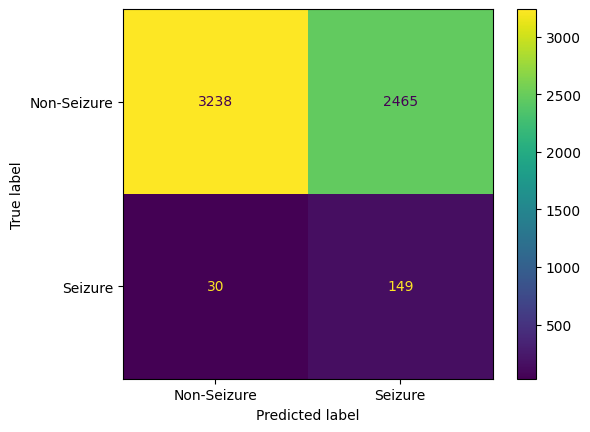

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
train_Y = train_Y.ravel()
train_X = np.array(train_df)
test_Y = test_Y.ravel()
test_X = np.array(test_df)

for i, classifier in enumerate(classifiers):
    print(classifier_names[i])
    classifier.fit(train_X, train_Y)
    
    for j, (test_X, test_Y) in enumerate(zip(test_df_list,test_Y_list)):
        predictions = classifier.predict(test_X)

        classifier_score_df = pd.DataFrame(
                            classification_report(test_Y,
                                                 predictions,
                                                 target_names=['Non-Seizure',
                                                               'Seizure'],
                                                 digits=2,
                                                 output_dict=True))

        cm = confusion_matrix(test_Y, predictions)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Seizure', 'Seizure'])
        disp.plot()
        plt.show()

        classifier_score_df.index.name = 'Metric'
        classifier_score_df['Classifier'] = classifier_names[i]
        classifier_score_df['MID'] = f'M{j+1}'
        classifier_score_df = classifier_score_df.set_index('Classifier', append=True)

        if j == 0:
            all_scores = classifier_score_df

        else:
            all_scores = pd.concat([all_scores, classifier_score_df])
        
        if j==9:
            all_scores.to_csv(f'./MLMethods/{classifier_names[i]}_results.csv')
        
# all_scores.sort_index()